# Neural Network Regression

* Architecture
* Input and Output shapes
* Creating custom data to view and fit
* Modelling steps
* Create, compile, fit and evaluate
* Different evaluation methods
* Saving and loading

In [ ]:
try:
    import tensorflow as tf
    from keras.utils import plot_model
    print(tf.__version__)
    import numpy as np
    import matplotlib.pyplot as plt
except:
    %pip install tensorflow, numpy, matplotlib
finally:
    plt.figure(figsize=(10,5))

# Define a relation function between two np arrays

In [ ]:
low, high = 0, 25
x = np.array([i*i - 10 for i in range(low, high)])
y = np.array([i for i in range(low, high)])
x, y, plt.scatter(x, y)

In [ ]:
# Relation function
y == np.sqrt(x + 10)

# Input and Output shapes

# Steps to tensorflow modelling
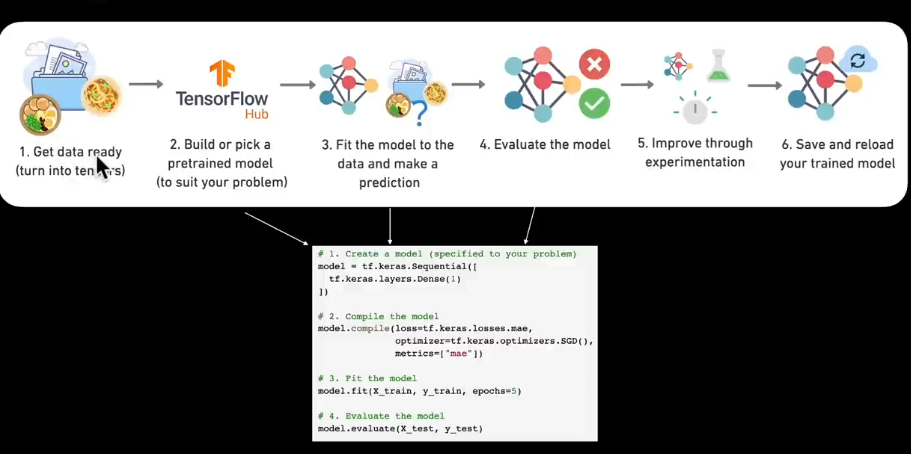
* Define in, out and hidden layers
* Define Loss funtion, Optimizer and evaluation metrics
* Test the model by letting it find the pattern

In [ ]:
tf.random.set_seed(42)
# Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile model
model.compile(loss=tf.keras.losses.mae,  # Mean Absoulute Error
              optimizer=tf.keras.optimizers.SGD(),  # Stochastic Gradient Descent
              metrics=["mae"])
# MAE = mean(abs(true - predicted), axis=-1)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
# Fit the model

In [ ]:
# # model.fit(x, y, epochs=1000)
# # model.evaluate(x,y), x.shape,y.shape, x, y
# x, y = x.reshape(1,-1), y.reshape(1, -1)
# x, y
# model.evaluate(x.reshape(-1, 1), y.reshape(-1, 1))

# Improving the model

* Add more layers
* Increase hidden units
* change activation functions
* Change optimization function
* Chnage learning rate
* More epochs and examples

In [ ]:
low, high = 0, 250
x = np.array([i - 10 for i in range(low, high)])
y = np.array([i for i in range(low, high)])
plt.scatter(x, y)

In [ ]:
# Relation function
y == x + 10

In [ ]:
x, y

In [ ]:
tf.random.set_seed(42)
# Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(500, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(500, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(500, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(500, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(500, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(500, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(1)
])
# Compile model
model.compile(loss=tf.keras.losses.mae,  # Mean Absoulute Error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Adam optimizer
              metrics=["mae"])
# MAE = mean(abs(true - predicted), axis=-1)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
# Fit the model

In [ ]:
# model.fit(x, y, epochs=10000) # Give full sets

# model.predict([30,11])

# Evaluation
* visualize the data, model, training and predictions

In [ ]:
x = tf.range(0,100)
x = tf.cast(x,tf.float32)
x

In [ ]:
y = tf.math.square(x)
y

In [ ]:
plt.plot(x,y)

# Three sets
* Train 70% - 80%
* Test 10% - 15%
* Valid 10% - 15%

In [ ]:
def split(n):
    return [np.real(n), np.imag(n)]

In [ ]:
x_train = x[:160]
y_train = y[:160]

x_test = x[-40:]
y_test = y[-40:]

len(x_train), len(y_train), len(x_test), len(y_test)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x_train, y_train, label="Training")
plt.plot(x_test, y_test, label = "Testing")
plt.legend()

In [ ]:
x.shape,y.shape, x[0].shape

In [ ]:
tf.random.set_seed(42)
n = len(x)
# Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(n, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(n, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(n, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(n, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(n, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(n, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(n, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(n, activation="relu"),  # hidden layers
    tf.keras.layers.Dense(1, input_shape = [1])
])
# Compile model
model.compile(loss=tf.keras.losses.mae,  # Mean Absoulute Error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics=["mae"])

In [ ]:
x_train = tf.reshape(x_train,(-1, 1))
y_train = tf.reshape(y_train,(-1, 1))
# Fit the model
model.fit(x_train, y_train, epochs=10000)

In [ ]:
model.summary()

In [ ]:
x_test,y_test

# Visualizing Model

In [ ]:
plot_model(model=model, show_shapes=True)

In [ ]:
y_pred = tf.reshape(model.predict(x_test), (1, -1))
y_pred, y_test

In [ ]:
# Plot function
def plot(train_data=x_train,
         test_data=x_test,
         train_labels=y_train,
         test_labels=y_test,
         pred=y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(train_data, train_labels, label="Training")
    plt.plot(test_data, test_labels, label="Testing")
    plt.scatter(test_data, tf.squeeze(pred), c="g", label="Prediction")
    plt.legend()
    ...


plot()